## Word Vectors ##

*This lesson is based on the [Advanced Topics in Word Vectors workshop](https://dh2018.adho.org/en/machine-reading-part-ii-advanced-topics-in-word-vectors/) at DH 2018 as well as tutorials by [Radim Rehurek](https://rare-technologies.com/word2vec-tutorial/) and [Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)** 

### What is a word vector? ###

A word vector or embedding is a **numerical representation** of a word within a corpus based on co-occurence with other words. Linguists have found that much of the meaning of a word can be derived from looking at its surrounding context. Today, we will explore word2vec, which is one popular approach to representing words in a numerical format.

### We're all speaking in prose! ###

We've actually already been exploring vectors of words: scikit-learn's `CountVectorizer()`, which we used to create the docuemnt-term matrix for our tf-idf calculations. But that looked at individual words in relation to a corpus. 

Today, we're going to look at words in relation to other words.

To start, let's take a look at [an example of word2vec in action](http://benschmidt.org/profGender/).

### What is Word2Vec ###

So, what is this word2vec that Schmidt used to make the website?

Word2Vec is a neural-network or deep learning based approach of generating word vectors. There are many resources out there that will go into the heavy details of deep learning in general or deep learning for NLP such as Yoav Goldberg's Neural Network Methods in Natural Language Processing (Morgan & Claypool Publishers, 2017). Today, you'll get a high level overview -- just enough for you to understand what w2v is doing. 

### Training the neural network ### 

Word2Vec uses a trick you may have seen (or heard about) elsewhere in machine learning. We’re going to train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! 

Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

**Note:** Neural networks are basically a bunch of weights in the form of matrices. If you have lots of these matrices multiplies in a row, you get layers that make your network 'deep' - hence the name deep learning. 

Usually if your network has one hidden (or projection) it's called a 'deep' network. The 'neurons' are just functions that transform your data non-linearly. Each layer of the network will tranform your data so your weights become more sophisticated (and meaningful?) with each layer.

![neural network](http://lklein.lmc.gatech.edu/wp-content/uploads/2019/10/mikolov.png)



### The Fake Task ###

So now we need to talk about this “fake” task that we’re going to build the neural network to perform, and then we’ll come back later to how this indirectly gives us those word vectors that we are really after.

We’re going to train the neural network to do the following. Given a specific word in the middle of a sentence (the input word), look at the words nearby and pick one at random. The network is going to tell us the probability for every word in our vocabulary of being the “nearby word” that we chose.

When I say "nearby", there is actually a "window size" parameter to the algorithm. A typical window size might be 5, meaning 5 words behind and 5 words ahead (10 in total).

The output probabilities are going to relate to how likely it is find each vocabulary word nearby our input word. For example, if you gave the trained network the input word “Soviet”, the output probabilities are going to be much higher for words like “Union” and “Russia” than for unrelated words like “watermelon” and “kangaroo”.

We’ll train the neural network to do this by feeding it word pairs found in our training documents. The below example shows some of the training samples (word pairs) we would take from the sentence “The quick brown fox jumps over the lazy dog.” I’ve used a small window size of 2 just for the example. The word highlighted in blue is the input word.

![skip-grams](http://mccormickml.com/assets/word2vec/training_data.png)

The network is going to learn the statistics from the number of times each pairing shows up. So, for example, the network is probably going to get many more training samples of (“Soviet”, “Union”) than it is of (“Soviet”, “Sasquatch”). When the training is finished, if you give it the word “Soviet” as input, then it will output a much higher probability for “Union” or “Russia” than it will for “Sasquatch”.

I've described something called the skim-gram methods of generating word vectors. THere's also another popular method called CBOW (continuous bag of words). The main difference is that while skip gram learns vectors by predicting the context words that come before and after our given word $w$, CBOW predicts the center word $w$ given context words.

### Let's try it out! ###

In [5]:
import gensim # remember this! 
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer

Next, we need to create our corpus.

In this case, we can start by creating the same list of docs, each doc as a single list item, as in our previous class. 

In [6]:
import os

base_dir = "./2019-09-ccp-corpus-0.3/ccprecords/" # NOTE: Your path may be different!!!

all_docs = [] # our list which will store the text of each doc; empty for now

docs = os.listdir(base_dir) # get a list of all the files in the directory

for doc in docs: # iterate through the docs
    if not doc.startswith('.'): # get only the .txt files
        with open(base_dir + doc, "r", encoding="utf-8") as file: # force unicode conversion to keep PCs happy
            text = file.read() # read in the file as a single text string
            all_docs.append(text) # append it to the all_docs list

# lastly, just check the length of all_docs to see if it's 147
len(all_docs)

147

But here, we also need each doc tokenized by sentence as well. 

So let's define a function that a takes a list of texts (e.g. our all_docs list) and converts it for gensim word2vec to use. The function will lower-case text and tokenize by sentence and word.

In [7]:
# need our handy nltk tokenizer 
tokenizer = TreebankWordTokenizer()

# and the function
def make_sentences(list_txt):
    all_txt = []
    for txt in list_txt:
        lower_txt = txt.lower()
        sentences = sent_tokenize(lower_txt)
        sentences = [tokenizer.tokenize(sent) for sent in sentences]
        all_txt += sentences
        print(len(sentences))  # let's check how many sentences there are per item
    return all_txt

In [10]:
# now let's run it

import nltk # if you're getting an error, add this line
nltk.download('punkt') # this too

sentences = make_sentences(all_docs)

[nltk_data] Downloading package punkt to /Users/lauren/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
33
376
12
177
16
726
148
387
4
368
379
559
322
72
623
34
6
24
198
323
429
1279
2576
529
15
785
51
42
200
13
466
185
9
140
280
972
110
25
88
31
349
176
4
30
169
553
80
360
22
159
84
124
192
9
1030
216
305
85
1228
126
299
481
129
179
575
12
67
20
418
1316
6
13
189
19
492
128
70
131
557
311
199
164
352
339
625
460
537
211
61
12
290
42
701
483
40
346
606
187
408
64
486
424
616
373
69
55
287
183
867
975
463
599
526
65
122
431
46
199
163
685
37
156
536
1030
70
240
56
417
237
85
130
217
549
168
614
162
421
72
405
1024
239
406
182
14
132
620
526


To train our vectors we call this function below. This function has a couple dozen parameters, some of which are more important than others.
Here are a few major ones. The fields that are MANDATORY are marked with an asterisk:
1. `sentences*`: This is where you provide your data. It must be in a format of iterable of iterables.
2. `sg`: Your choice of training algorithm. There are two standard ways of training W2V vectors -- 'skipgram' and 'CBOW'. If you enter 1 here the skip-gram is applied; otherwise, the default is CBOW.
3. `size*`: This is the length of your resulting word vectors. If you have a large corpus (>few billion tokens) you can go up to 100-300 dimensions. Generally word vectors with more dimensions give better results.
4. `window`: This is the window of context words you are training on. In other words, how many words come before and after your given word. A good number is 4 here but this can vary depending on what you are interested in. For instance, if you are more interested in embeddings that embody semantic meaning, smaller window sizes work better. 
5. `alpha`: The learning rate of your model. If you are interested in machine learning experimentation with your vectors you may experiment with this parameter.
6. `seed` (int): This is the random seed for your random initialization. All deep learning models initialize the weights with random floats before training. This is a useful field if you want to replicate your experiments because giving this a seed will initialize 'randomly' deterministically.
7. `min_count`: This is the minimum frequency threshold. If a given word appears with lower frequency than provided it will be ignored. This is here because words with very low frequency are hard to train.
8. `iter`: This is the number of iterations(entire run) over the corpus, also known as epochs. Usually anything between 1-10 is ok. The trade offs are that if you have higher iterations, it will take longer to train and the model may overfit on your dataset. However, longer training will allow your vectors to perform better on tasks relevant to your dataset.

Overall, most of these settings wil not concern you unless you are interested in very specific usages of word vectors.

In [11]:
# let's train our model!

ccp_model = gensim.models.Word2Vec(
    sentences,
    min_count=2, # default is 5; this trims the corpus for words only used once; 
    size=200, # size of NN layers; default is 100; higher for larger corpora
    workers=5) # parallel processing; needs Cython; remove this param if you don't have cython installed

In [12]:
# take a quick look at the vocab

ccp_model.wv.vocab

{'the': <gensim.models.keyedvectors.Vocab at 0x7fc4a8661278>,
 'jersey': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767be0>,
 'convention': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767a90>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767940>,
 'we': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767dd8>,
 'have': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767eb8>,
 'received': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767da0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767860>,
 'call': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767ba8>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fc4b97679e8>,
 'new': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767e10>,
 'citizens': <gensim.models.keyedvectors.Vocab at 0x7fc4b9767d30>,
 "'": <gensim.models.keyedvectors.Vocab at 0x7fc48a3abc18>,
 'state': <gensim.models.keyedvectors.Vocab at 0x7fc48a3abc88>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fc48a3abd68>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7fc48a3ab

It's often useful to save your trained model to disk so that you can reload it as needed. 

In [13]:
ccp_model.save('ccp_model')

And you can load a model in the same way (remember this from our topic model)

In [14]:
old_model = gensim.models.Word2Vec.load('ccp_model') 

Now the fun begins. Let's find some similar words!

In [15]:
# basic similarity
ccp_model.wv.most_similar("freedom", topn=10)

[('liberty', 0.9430526494979858),
 ('life', 0.8966236114501953),
 ('humanity', 0.892913818359375),
 ('nature', 0.888824462890625),
 ('sacred', 0.8806590437889099),
 ('universal', 0.8758835792541504),
 ('happiness', 0.87128746509552),
 ('justice', 0.8710302114486694),
 ('oppression', 0.8687812089920044),
 ('mankind', 0.8636407852172852)]

In [16]:
# similarity b/t two words

print(ccp_model.wv.similarity(w1="freedom",w2="justice"))
print(ccp_model.wv.similarity(w1="freedom",w2="dinner"))

0.8710301482542349
-0.04838361627282829


You can also play with analogy tasks. The commonly seen task is:

'Man is to King as Woman is to ____?'


' A      is to A\*.     as B      is to  B\*  '
                         
Gensim provides two different ways of implementing this task. You may be more familiar with the the additive version also called the 3CosAdd method:

$$\underset{b*\in V}{\textrm{arg max}} (cos(b*,b) - cos(b*,a) + cos(b*,a*))$$

This reflects the abstraction of Woman - Man + King. In this maximization, we are searching which word vector will allow us to produce the highest value in this equation.

We can implement this method with a provided function. Positive here refers to words that give the positive contribution to similarity (nominator), and negative refers to words that contribute negatively (denominatory). Here's the additive method.

In [17]:
# analogies
# format is: "man is to king as woman is to ???"

ccp_model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('lowe', 0.9034399390220642),
 ('haines', 0.903089165687561),
 ('maine', 0.9013556241989136),
 ('huntingdon', 0.8901251554489136),
 ('mississippi', 0.8893768191337585),
 ('cruz', 0.887715220451355),
 ('mason', 0.8860368132591248),
 ('cambria', 0.8838146924972534),
 ('norman', 0.8817623257637024),
 ('drawers', 0.8798317313194275)]

Not very impressive. But that's likely because the terms "woman" and "king" are not used much in the corpus. Let's try again with some terms that we know are significant to the corpus:

In [18]:
# analogies
# format is: "freedom is to slavery as liberty is to ???"

ccp_model.wv.most_similar(positive=['liberty', 'slavery'], negative=['freedom'])

[('republican', 0.7554585337638855),
 ('civilization', 0.7409763336181641),
 ('law', 0.7375818490982056),
 ('democratic', 0.7367520928382874),
 ('justice', 0.7323439717292786),
 ('world', 0.7281155586242676),
 ('christianity', 0.7253871560096741),
 ('equality', 0.7251092195510864),
 ('human', 0.7243856191635132),
 ('emancipation', 0.7188071012496948)]

Gensim has quite a few built-in tools, and it's worth taking some time to see what's available. Check the documentation here: [https://radimrehurek.com/gensim/models/keyedvectors.html](https://radimrehurek.com/gensim/models/keyedvectors.html)


In [19]:
### Let's do some visualization ###

import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

In [20]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.wv.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


<IPython.core.display.Javascript object>


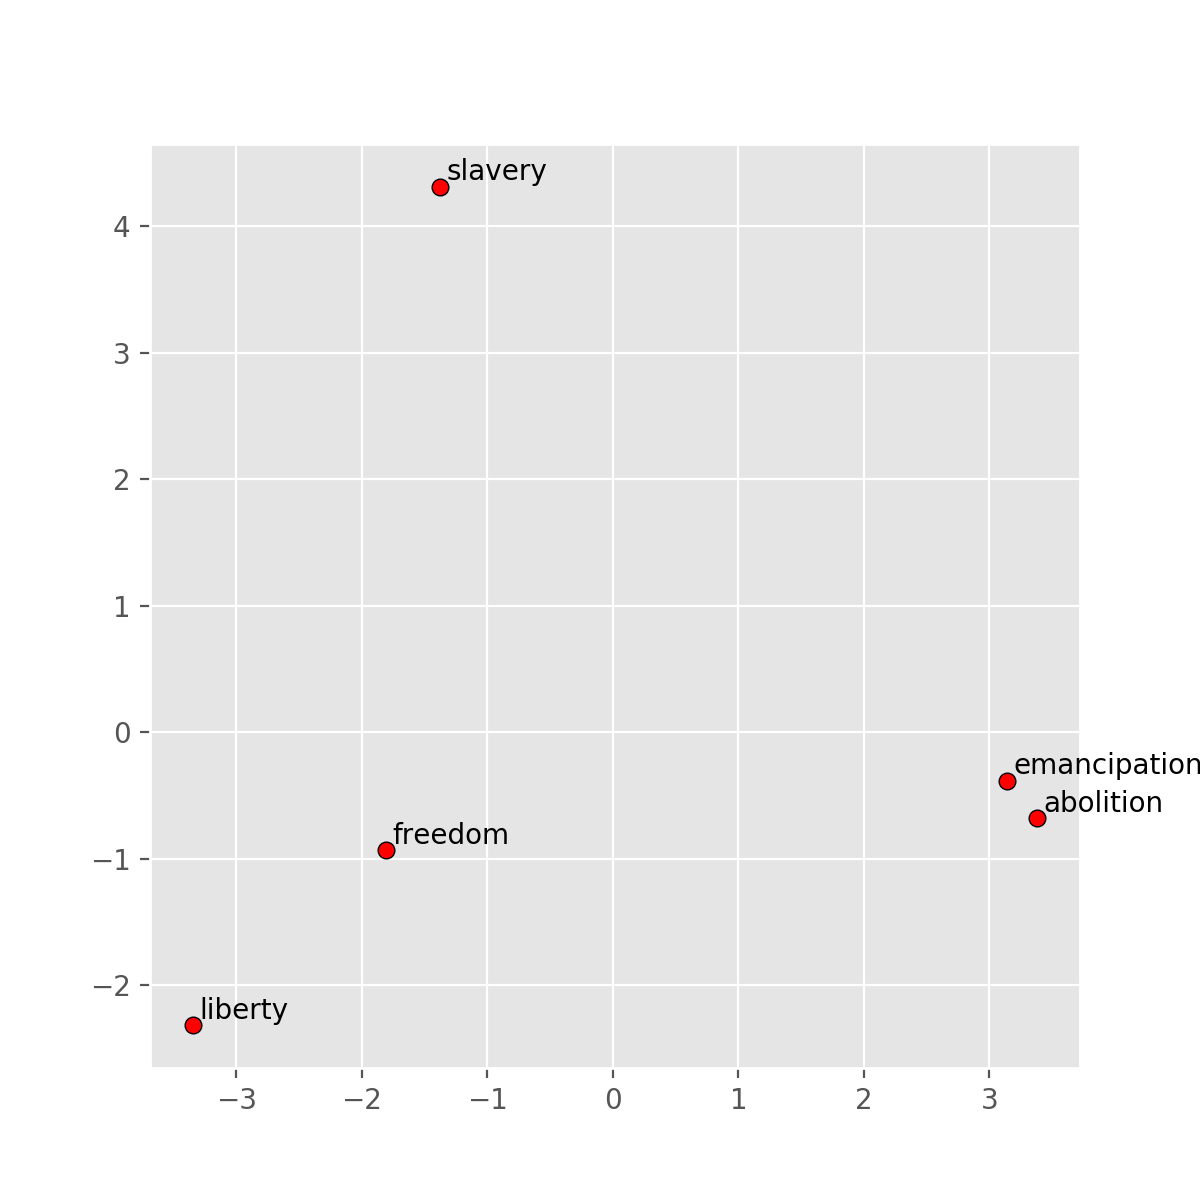

In [21]:
display_pca_scatterplot(ccp_model, ['freedom','liberty','slavery','abolition','emancipation'])


# display_pca_scatterplot(ccp_model, sample=20)